# Hab Dishab Dopamine Analysis

DA data

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from hd_extension import *

In [ ]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac_csvs"
brain_region = '#15616F'

# NAc: #15616F
# mPFC: #FFAF00

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc_csvs"
# brain_region = '#FFAF00'

In [3]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]

In [4]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p1-240516-064158\Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p2-240516-071921\Notes.txt
read from t=0s to t=1556.22s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p3-240516-075659\Notes.txt
read from t=0s to t=1538.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p4-240516-083255\Notes.txt
read from t=0s to t=1773.98s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p5-240821-092649\Notes.txt
read from t=0s to t=1326.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p6-240821-103616\Notes.txt
read from t=0s to t=1

### Peak standard z-score

In [5]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = True)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, #otal_avg_bout_duration
                                  use_adaptive=False, 
                                  allow_bout_extension=False,
                                  mode='standard')

Processing behaviors for p1-240516-064158...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Processing behaviors for p4-240516-083255...
Processing behaviors for p5-240821-092649...
Processing behaviors for p6-240821-103616...
Processing behaviors for p7-240821-111323...
Processing behaviors for p8-240821-121933...
Processing behaviors for pp1-250115-080205...
Processing behaviors for pp2-250115-083739...
Processing behaviors for pp3-250115-091306...
Processing behaviors for pp4-250115-094555...
Processing behaviors for pp5-250114-053943...
Processing behaviors for pp6-250114-061037...
Processing behaviors for pp7-250114-070021...
Processing behaviors for pp8-250114-080316...
Computing DA metrics for p1-240516-064158 ...
Computing DA metrics for p2-240516-071921 ...
Computing DA metrics for p3-240516-075659 ...
Computing DA metrics for p4-240516-083255 ...
Computing DA metrics for p5-240821-092649 ...
Computing DA metrics for p6-240821-103616 

In [6]:
exp_da_dict = get_trial_dataframes(experiment)

In [7]:
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [8]:
da_metadata_df.head(6)

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,p1,s1-1,Investigation,16.077557,5.778781,0.564744
1,p1,s1-2,Investigation,0.314949,0.407145,0.100556
2,p1,s1-3,Investigation,-1.003127,-0.747583,-1.158164
3,p1,s1-4,Investigation,1.145754,2.145404,1.913905
4,p1,s1-5,Investigation,0.075788,0.317017,0.126643
5,p1,s2-1,Investigation,8.670519,3.274460,1.008235


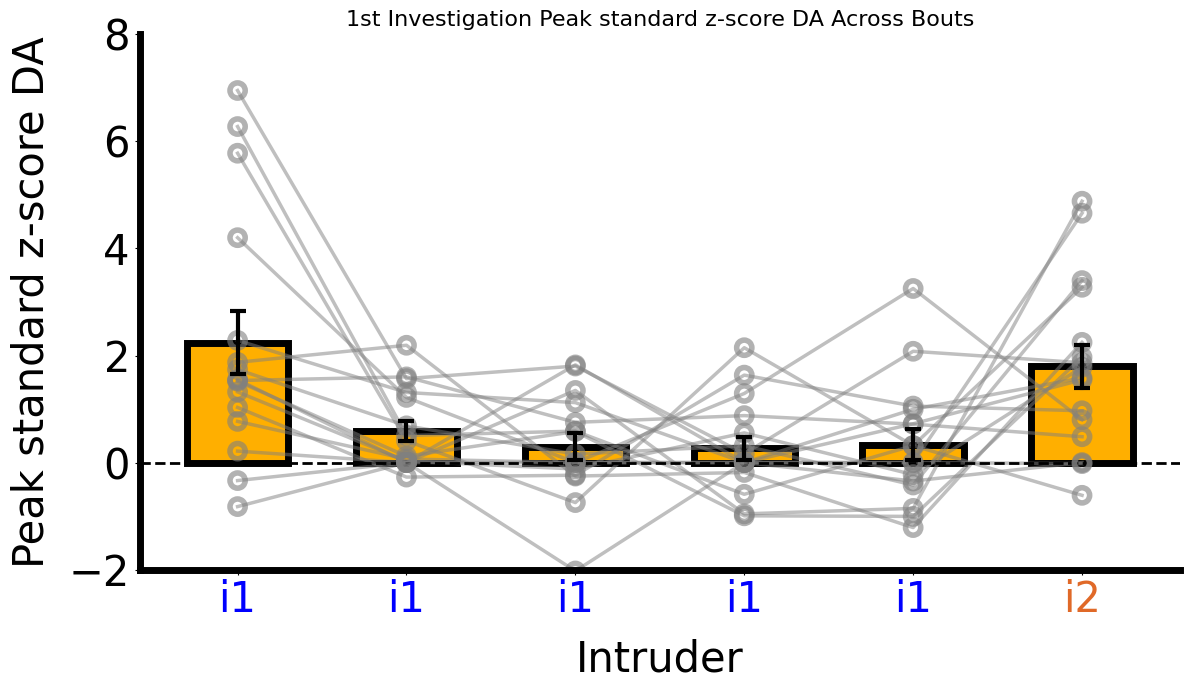

In [9]:
# Average Bout Duration Across Bouts
plot_behavior_times_across_bouts_gray(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title="1st Investigation Peak standard z-score DA Across Bouts",
    xlabel="Intruder",
    ylabel="Peak standard z-score DA",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-2, 7),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(12,7),
    pad_inches=0.1,
    save=False,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_C1-3_Peak_Across_Bouts.png"
)

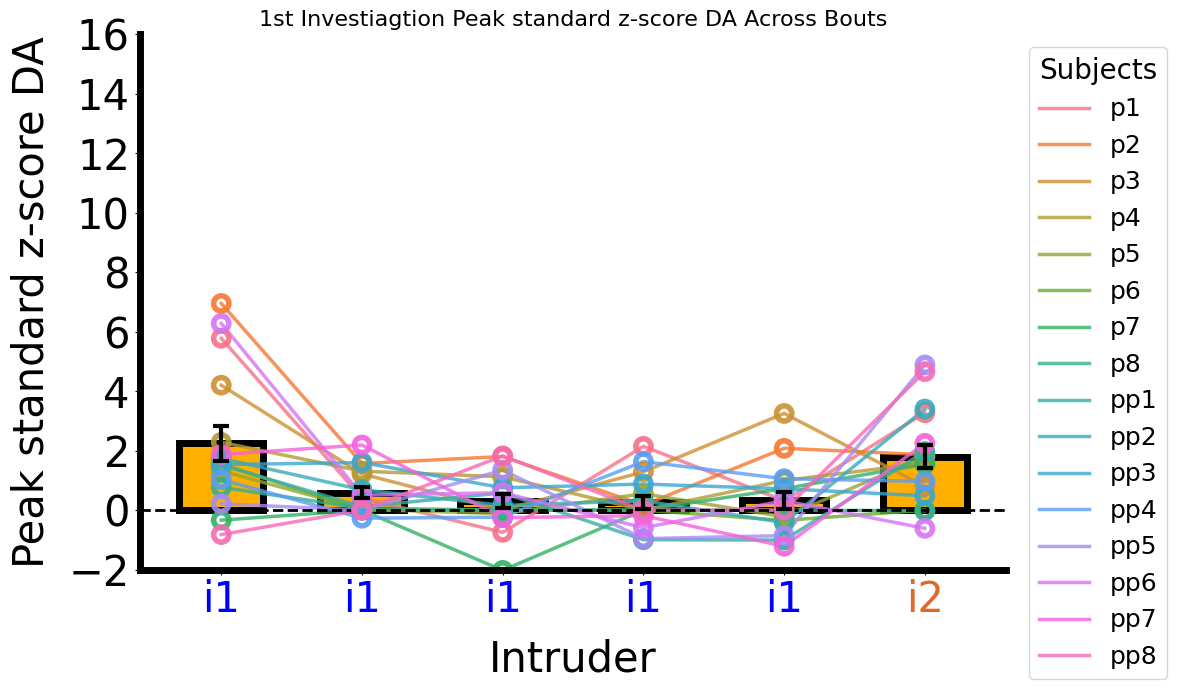

In [10]:
# Average Bout Duration Across Bouts
plot_behavior_times_across_bouts_colored(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title="1st Investiagtion Peak standard z-score DA Across Bouts",
    xlabel="Intruder",
    ylabel="Peak standard z-score DA",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-2, 15),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(12,7),
    pad_inches=0.1,
    save=False,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_C1-3_Peak_Across_Bouts_WIDENTITIES.png"
)

In [11]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, #otal_avg_bout_duration
                                  use_adaptive=False, 
                                  allow_bout_extension=False,
                                  mode='standard')

Processing behaviors for p1-240516-064158...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Processing behaviors for p4-240516-083255...
Processing behaviors for p5-240821-092649...
Processing behaviors for p6-240821-103616...
Processing behaviors for p7-240821-111323...
Processing behaviors for p8-240821-121933...
Processing behaviors for pp1-250115-080205...
Processing behaviors for pp2-250115-083739...
Processing behaviors for pp3-250115-091306...
Processing behaviors for pp4-250115-094555...
Processing behaviors for pp5-250114-053943...
Processing behaviors for pp6-250114-061037...
Processing behaviors for pp7-250114-070021...
Processing behaviors for pp8-250114-080316...
Computing DA metrics for p1-240516-064158 ...
Computing DA metrics for p2-240516-071921 ...
Computing DA metrics for p3-240516-075659 ...
Computing DA metrics for p4-240516-083255 ...
Computing DA metrics for p5-240821-092649 ...
Computing DA metrics for p6-240821-103616 

In [12]:
experiment.trials['p1-240516-064158'].behaviors.head(6)

,Bout,Behavior,Event_Start,Event_End,Duration (s),AUC,Max Peak,Time of Max Peak,Mean Z-score,Adjusted End,Relative_Time_Axis,Relative_Zscore
0,s1-1,Approach,237.533,238.466,0.933,0.500120,0.712452,0.932838,0.536767,238.466,"[-4.0, -3.999016960019661, -3.9980339200393216...","[-0.23534659136177177, -0.23536477127124575, -..."
1,s1-1,Approach,260.067,261.066,0.999,-0.761017,-0.595264,0.998928,-0.761853,261.066,"[-4.0, -3.999016960019661, -3.9980339200393216...","[-1.420028571855927, -1.419874589051976, -1.41..."
2,s1-1,Investigation,197.267,225.733,28.466,16.077557,5.778781,3.149293,0.564744,225.733,"[-4.0, -3.999016960019661, -3.9980339200393216...","[-4.923534622753999, -4.92390533836681, -4.924..."
3,s1-1,Investigation,238.467,247.200,8.733,0.946926,1.083557,4.481501,0.108455,247.200,"[-4.0, -3.999016960019661, -3.9980339200393216...","[-0.26599063917847204, -0.2658544492076432, -0..."
4,s1-1,Investigation,249.067,253.133,4.066,2.251592,1.464114,0.511122,0.553925,253.133,"[-4.0, -3.999016960019661, -3.9980339200393216...","[-0.470523546941725, -0.4705286224831728, -0.4..."
5,s1-1,Investigation,255.733,256.133,0.400,-0.510056,-1.152034,0.000919,-1.281120,256.133,"[-4.0, -3.999016960019661, -3.9980339200393216...","[0.2412662935399507, 0.24124837331944207, 0.24..."


In [13]:
exp_da_dict = get_trial_dataframes(experiment)
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']


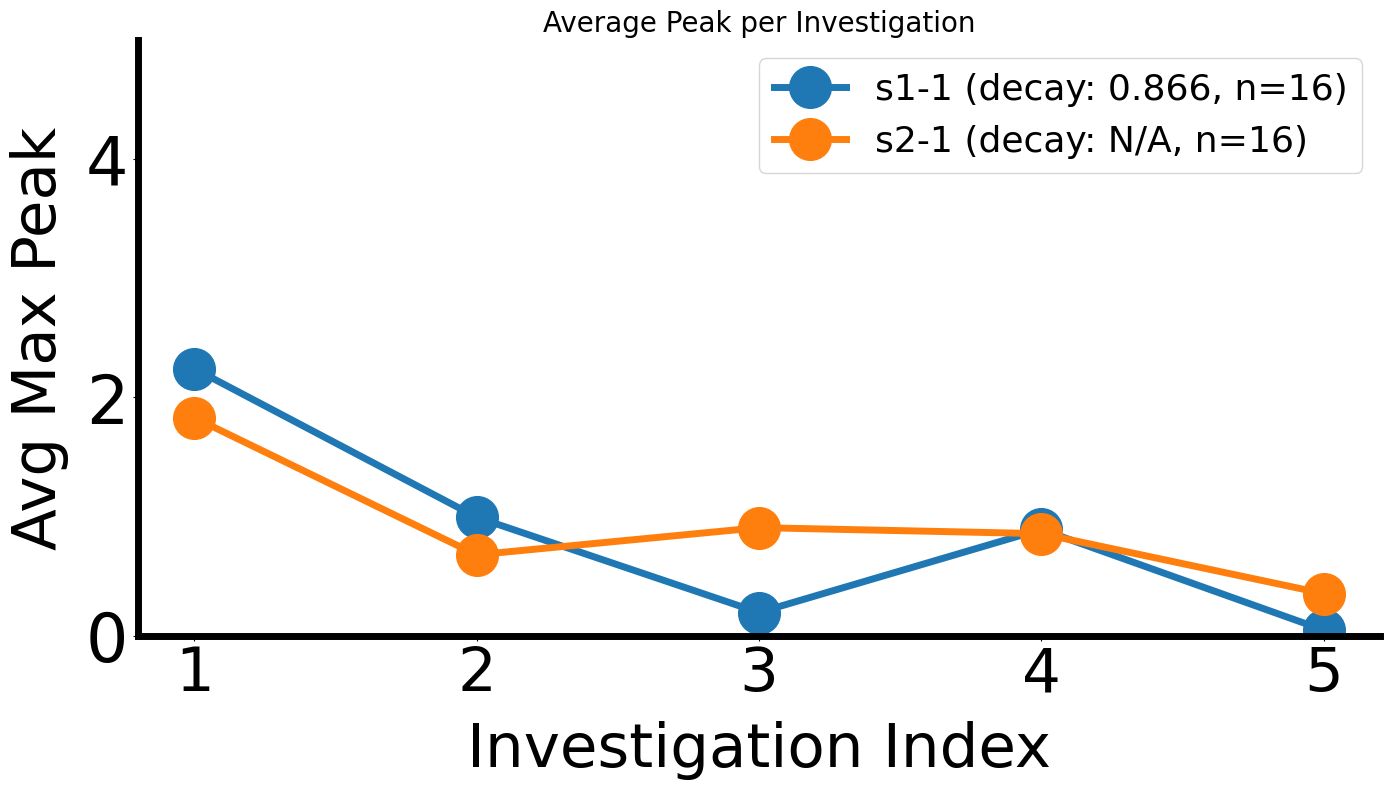


=== Computed Metric (DECAY): ===
Bout: s1-1, decay = 0.866
Bout: s2-1, decay = nan


In [18]:
# Suppose exp_da_dict = {"nn8": df_nn8, "nn3": df_nn3, ...}

# Plot the first 3 investigations for bouts s1-1 and s1-2:
df_final = plot_peak_for_subsequent_investigations_custom(
    exp_da_dict,
    selected_bouts=["s1-1", "s2-1"],
    n_subsequent_investigations=5,
    peak_col="Max Peak",
    metric_type='decay', 
    ylim=(0, 5)
)


In [17]:
df_final

,Bout,InvestigationIndex,SubjectCount,AvgPeak
0,s1-1,1,16,2.242136
1,s1-1,2,16,0.994580
2,s1-1,3,16,0.194073
3,s1-1,4,15,0.892061
4,s1-1,5,15,0.046799
5,s2-1,1,16,1.830218
6,s2-1,2,16,0.678613
7,s2-1,3,16,0.906965
8,s2-1,4,14,0.856429
9,s2-1,5,14,0.353487
